# Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.

three Matplotlib functions
+ ``plt.contour`` for contour plots + ``plt.clabel`` for contour label
+ ``plt.contourf`` for filled contour plots
+ ``plt.imshow`` for showing images

## Prepare Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

In [3]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [46]:
x = np.linspace(0, 5, 300)
y = np.linspace(0, 5, 400)

X, Y = np.meshgrid(x, y) # builds two-dimensional grids from one-dimensional arrays
print(x.shape, X.shape, y.shape, Y.shape)
Z = f(X, Y)

(300,) (400, 300) (400,) (400, 300)


### ``plt.contour``

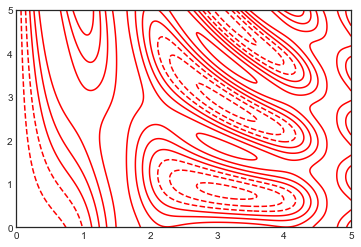

In [84]:
plt.contour(X, Y, Z, colors='red')

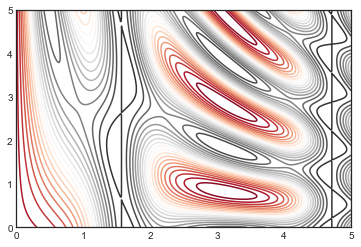

In [48]:
plt.contour(X, Y, Z, 20, cmap='RdGy') #20 equally spaced intervals within the Z range

<a list of 18 text.Text objects>

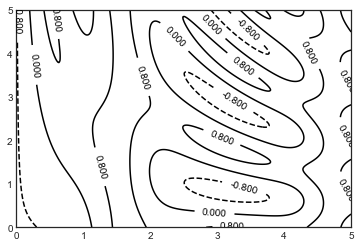

In [85]:
contours = plt.contour(X, Y, Z, 2, colors = 'k')
plt.clabel(contours) # add label

### ``plt.contourf``

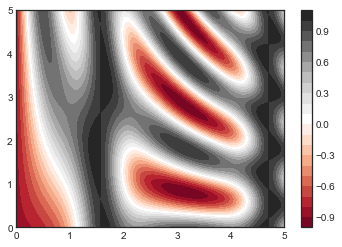

In [49]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

### ``plt.imshow``

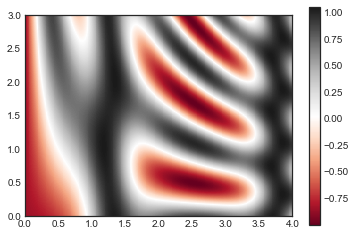

In [90]:
# otherway to generate the contour is use plt.imshow, looks more smooth.
plt.imshow(Z, extent=[0, 4, 0, 3], origin='lower',
           cmap='RdGy')
plt.colorbar()
#plt.axis(aspect='image') # seems won't change anything....

There are a few potential gotchas with ``imshow()``, however:

- ``plt.imshow()`` doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data by ``origin='lower'``
- ``plt.imshow()`` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, ``plt.axis(aspect='image')`` to make *x* and *y* units match.

### combine the contour line and the plot

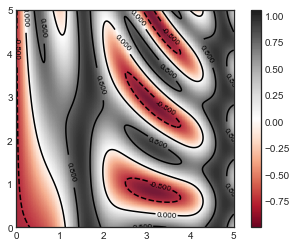

In [96]:
# the contour line layer
contours = plt.contour(X, Y, Z, 2, colors='black')
plt.clabel(contours, inline=True, fontsize=8) #add contour label
# the colorful plot layer
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.9)  #extent=[0, 5, 0, 5] is important
# the color bar
plt.colorbar()